# ADVCANCED CLASSIFICATION EXAM

© Explore Data Science Academy

Honour Code I Nomfundo Makoto, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

# Predict Overview: Language Identification

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Problem Statement

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Data overview

There are 11 official languages in this country, all of which are given equal recognition. The majority of South Africans speak two or more of the official languages and are multilingual. 

# Table of Contents

1. Importing Packages


2. Loading Data


3. Data Engineering


4. Exploratory Data Analysis (EDA)


5. Modeling


6. Model Performance



# 1. Importing Packages

Back to Table of Contents

⚡ Description: Importing Packages ⚡

Github link. https://github.com/mfundormakoto
kaggle username: Nomfundo Makoto

In [152]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


from sklearn.model_selection import train_test_split

 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import * 
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [153]:
%pip3 install comet_ml

UsageError: Line magic function `%pip3` not found.


In [154]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HYdfgoXNArV4k1itZsL1ykmiD",
    project_name="https-github-com-015khai-south-african-language-identification-hack-2022",
    workspace="015khai",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\27815\\Desktop\\kaggle hackerthon\\train_set.csv' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/015khai/https-github-com-015khai-south-african-language-identification-hack-2022/0dc6a04c930e4765bd3aafa3058d6af3



In [155]:
def read_file(path):
    '''This function reads the csv file given and displays the first five rows'''
    data = pd.read_csv(path)

    return data

# 2. Loading the Data

Back to Table of Contents

In [156]:
# Load train data
train_df = pd.read_csv('train_df.csv')

# Load test data
test_df = pd.read_csv('test_df.csv')

# 3. Exploratory Data Analysis (EDA)

Back to Table of Contents

⚡ Description: Exploratory data analysis ⚡

3.1 Inspecting the Dataframes
We are going to look at the data before we do further explorotary analysis

In [157]:
#displaying the first rows
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [158]:
test_df["index"].value_counts()

1       1
3818    1
3794    1
3793    1
3792    1
       ..
1893    1
1892    1
1891    1
1890    1
5682    1
Name: index, Length: 5682, dtype: int64

In [159]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [160]:
train_df["lang_id"].value_counts() # There are 11 languages and 3000 sentenses in each category

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [161]:
# Verifying the data types and establishing if there are null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [162]:
# Establishing if the semntenses have stop words
train_df['text'][0:5]

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

# 4. Analysis of the Language Distribution in the Dataset and Histogram

⚡ Description: language distribution ⚡

   Back to Table of Contents

In [163]:
X = train_df['text']
y = train_df['lang_id']

In [164]:
Xhosa = train_df[y == "xho"]
English = train_df[y == "eng"]
Nso = train_df[y == "nso"]
Venda = train_df[y == "ven"]
Tswana = train_df[y == "tsn"]
Ndebele = train_df[y == "nbl"]
Zulu = train_df[y == "zul"]
Swati = train_df[y == "ssw"]
Tsonga = train_df[y == "tso"]
Sotho = train_df[y == "sot"]
Afrikaans = train_df[y == "afr"]

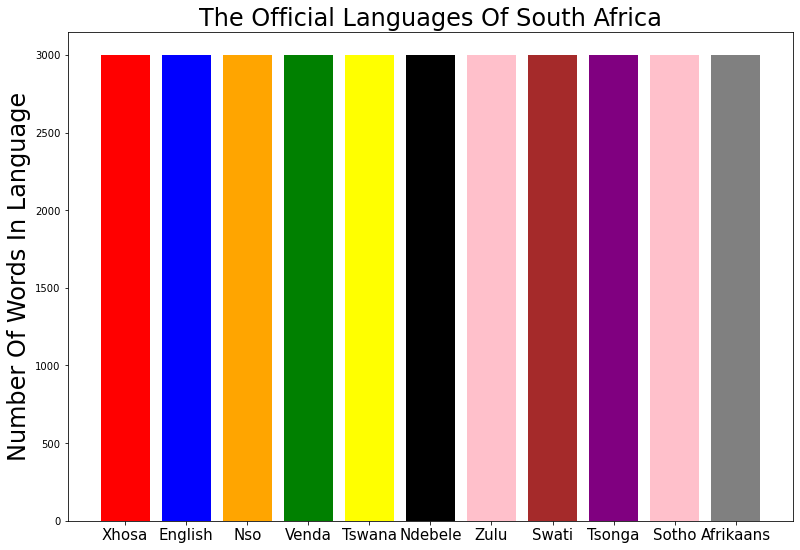

In [165]:
plt.figure(figsize=(13,9))
labels = y.unique()
heights = [len(Xhosa),len(English),len(Nso),len(Venda), len(Tswana), len(Ndebele), len(Zulu), len(Swati), len(Tsonga), len(Sotho), len(Afrikaans)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green", "yellow", "black", "pink", "brown", "purple", "pink", "grey"])
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'])
plt.ylabel("No of Observations")
plt.title("The Official Languages Of South Africa", fontsize = 24)
plt.ylabel("Number Of Words In Language", fontsize = 24)
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'], fontsize = 15)
plt.show()

# 5. Analysis of the language distribution in the dataset and pie chart

Back to Table of Contents

13.9
13.9


<AxesSubplot:ylabel='lang_id'>

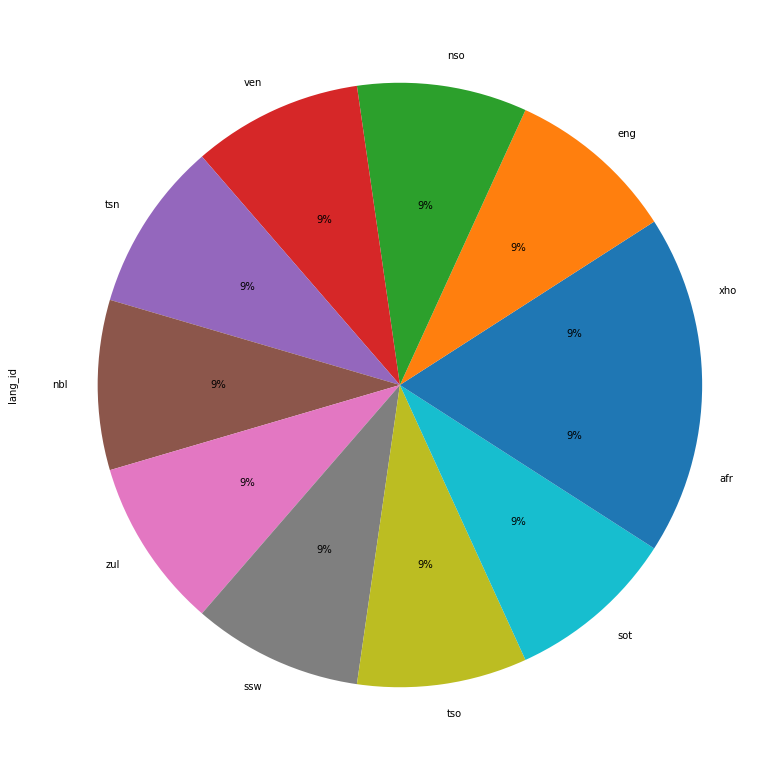

In [166]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 13.9
plot_size[1] = 13.9
plt.rcParams["figure.figsize"] = plot_size 

#  distribution of sentenses from the dataset
train_set.lang_id.value_counts().plot(kind='pie', autopct='%1.0f%%')

#  HEATMAP

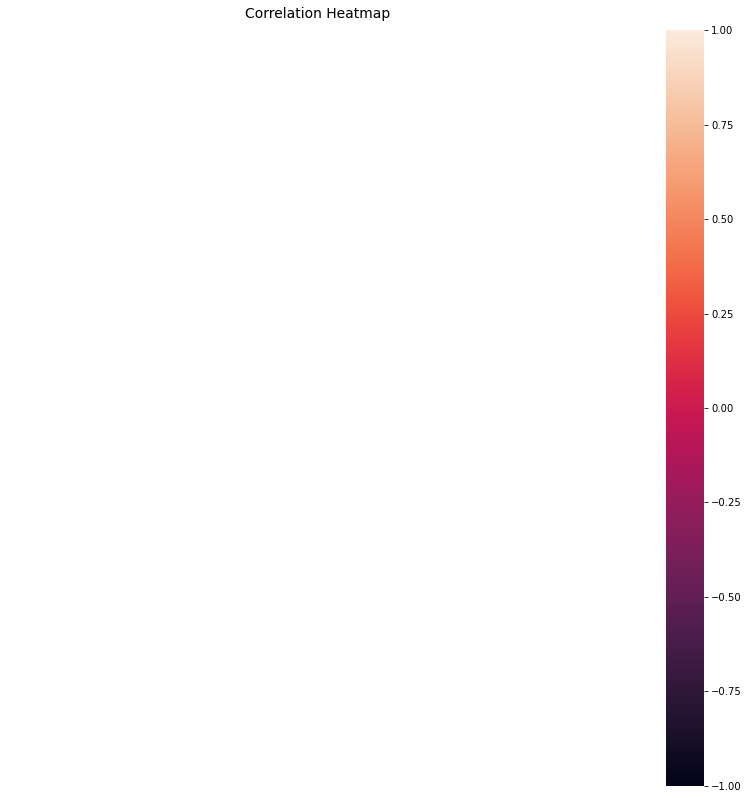

In [167]:
heatmap = sns.heatmap(train_set.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13.9}, pad=12);

In [168]:
temp = train_df.groupby('lang_id').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp['percentage'] = round((temp['text']/temp['text'].sum())*100,2) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='icefire')

,lang_id,text,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


<AxesSubplot:title={'center':'Density curve'}, xlabel='text', ylabel='Density'>

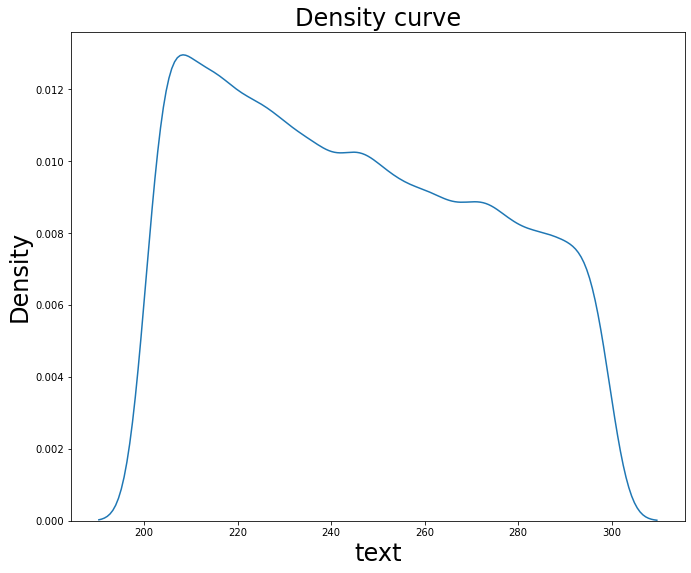

In [169]:
plt.figure(figsize=(11,9))
length = train_df["text"].str.len()
plt.title("Density curve", fontsize = 24)
plt.xlabel("text", fontsize = 24)
plt.ylabel("Density", fontsize = 24)
sns.kdeplot(length)

# 6. Feature Engineering

Classifying the independent and dependent variables

Back to Table of Contents

⚡ Description: feature ⚡

In [170]:
X = train_df["text"] #text data is the independent variable of the training set
y = train_df["lang_id"] #lang_id is the dependent variable of the training set
X_t = test_df['text'] #text data is the independent variable of the test set

# Text Preprocessing

Cleaning our dataset to remove symbols that will determine the quality of our model.

In [171]:
# Make text lowercase        
text = str(train_df["text"]).lower()

import re
import string
def cleaning(text):

# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_text']=train_df['text'].apply(lambda x: cleaning(x))
test_df['clean_text']=test_df['text'].apply(lambda x: cleaning(x))

In [172]:
#Let's observe our progress thus far
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [173]:
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


Natural Language Processing: Tokenization,Lemmatization

In [174]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_text'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_text'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [175]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemma_df(text, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in text]
train_df['lemma'] = train_df['tokenized_message'].apply(lemma_df, args=(lemmatizer, ))
for i, t in enumerate(train_df.iloc[5]['tokenized_message']):
    print ('{:20s} --> {:10s}'.format(t, train_df.iloc[5]['lemma'][i]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\27815\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


dinyaki              --> dinyaki   
i                    --> i         
o                    --> o         
t                    --> t         
e                    --> e         
t                    --> t         
a                    --> a         
go                   --> go        
dirwa                --> dirwa     
gabedi               --> gabedi    
ka                   --> ka        
ngwaga               --> ngwaga    
di                   --> di        
tla                  --> tla       
lebelela             --> lebelela  
diphetogo            --> diphetogo 
t                    --> t         
a                    --> a         
mebaraka             --> mebaraka  
ya                   --> ya        
me                   --> me        
omo                  --> omo       
le                   --> le        
mekgwa               --> mekgwa    
ga                   --> ga        
mmogo                --> mmogo     
le                   --> le        
go                   --> go 

In [176]:
#Let's observe our progress thus far
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb..."
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [177]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['tokenized_message'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['tokenized_message'].apply(lambda x:
                                                          detokenization(x))

In [178]:
#let's see how that looks
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m...",o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [179]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta


Comparing the raw text from the data set with what we have now

In [180]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['text'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_text'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['text'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_text'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [181]:
train_df.head(3)

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,25,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,33,2
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...,37,38,1


In [182]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...,10,10,0
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...,10,10,0
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu,7,7,0
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...,7,7,0
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta,4,4,0


In [183]:
temp = train_df.groupby('lang_id').count()['detokenized_message'].reset_index().sort_values(by='detokenized_message',ascending=False)
temp['percentage'] = round((temp['detokenized_message']/temp['detokenized_message'].sum())*100,2) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='icefire')

,lang_id,detokenized_message,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


In [184]:
train_df= train_df.drop('Num_words_clean', axis=1)
test_df= test_df.drop('Num_words_clean', axis=1)
train_df.head(2)

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,2


In [185]:
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,2
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...,37,1
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m...",o netefat a gore o ba file dilo ka moka t e le...,40,4
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...,43,0


# 7. MODELING

VECTORIZATION

CountVectorizer to convert our dataset from text to numerical form.

In [186]:
#Assigning variables
X_d = train_df['detokenized_message']
y = train_df['lang_id']

Text to numbers conversion

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)
#look at the shape

In [188]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

In [189]:
#look at the shape
X.shape 

(33000, 206310)

We use transform on the test dataset 

In [190]:
# The test data is transformed using transform()
X_t = cv.transform(X_t)
X_t.shape

(5682, 141958)

Train Test Splitting
Creating the training set, for training the model

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

# 8. Model Training and Prediction

Back to Table of Contents


In this part we train our model uisng different models from the training set and later predict the output for the test set.

# NAIVE_BAYES algorithm

In [192]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

#fitting the Naive_Bayes model
model.fit(x_train, y_train)

#predicting the y labels
y_pred1 = model.predict(x_test)

#metrics reporting
acc = accuracy_score(y_test, y_pred1)

report = classification_report(y_test,y_pred1)

print("Accuracy is :",acc)
#print("Matrix is :",cm)
print("Report is :",report)

Accuracy is : 0.9992424242424243
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       1.00      1.00      1.00       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       1.00      1.00      1.00       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Random Forest Regressor

In [193]:
rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf.fit(x_train,y_train) # Fit/Train Random Forest Classifer on training set

#predict y labels
y_pred5 = rf_clf.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred5)

report = classification_report(y_test,y_pred5)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9886363636363636
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       0.99      1.00      1.00       574
         nbl       0.98      0.95      0.97       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       0.98      0.98      0.98       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       0.98      0.98      0.98       621
         zul       0.95      0.97      0.96       634

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



# BernoulliNB model

In [194]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred3 = BNBmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred3)

report = classification_report(y_test,y_pred3)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9965151515151515
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       1.00      0.98      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       0.97      1.00      0.98       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Logistics Regression

In [195]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)# Creating a logistics regression
#fit the train data
LRmodel.fit(x_train, y_train)
#predict y labels
y_pred2 = LRmodel.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred2)

report = classification_report(y_test,y_pred2)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9971212121212121
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      0.99      1.00       621
         zul       0.99      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Support Vector Classifier

In [196]:
from sklearn.svm import SVC

svc = SVC( kernel='rbf')
svc.fit(x_train, y_train)
y_pred4 = svc.predict(x_test)

#metrics report
acc = accuracy_score(y_test, y_pred4)
report = classification_report(y_test,y_pred4)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9968181818181818
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       574
         nbl       0.99      0.99      0.99       613
         nso       1.00      1.00      1.00       570
         sot       1.00      0.99      1.00       600
         ssw       1.00      1.00      1.00       624
         tsn       1.00      1.00      1.00       581
         tso       1.00      1.00      1.00       597
         ven       1.00      1.00      1.00       599
         xho       1.00      1.00      1.00       621
         zul       0.99      0.99      0.99       634

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# Passive Aggresive Classifier

In [197]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X = tfidf_vectorizer.fit_transform(train_df['text'])
X_t = tfidf_vectorizer.transform(test_df['text'])
Y = train_df.lang_id
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(X_train, Y_train)
pred = pass_tf.predict(X_test)


acc = accuracy_score(Y_test, pred)#metrics reporting
report = classification_report(Y_test,pred)

print("Accuracy is :",acc)
print("Report is :",report)

Accuracy is : 0.9975757575757576
Report is :               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       585
         eng       1.00      1.00      1.00       621
         nbl       1.00      0.99      0.99       576
         nso       1.00      1.00      1.00       611
         sot       1.00      1.00      1.00       580
         ssw       1.00      0.99      1.00       594
         tsn       0.99      1.00      1.00       584
         tso       1.00      1.00      1.00       656
         ven       1.00      1.00      1.00       615
         xho       0.99      1.00      1.00       597
         zul       0.99      0.99      0.99       581

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 9. Model Evaluation

Back to Table of Contents

In [198]:
names = ['MultinomialNB', 'Random Forest',
         'LogisticRegression', 'BernoulliNB','SVC','PassiveAggressiveClassifier'
         ]

In [199]:
classifiers = [
    MultinomialNB(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1),
    BernoulliNB(),
    SVC(kernel='rbf'),
    PassiveAggressiveClassifier() 
    ]

In [200]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting MultinomialNB model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting LogisticRegression model...
... predicting
... scoring
Fitting BernoulliNB model...
... predicting
... scoring
Fitting SVC model...
... predicting
... scoring
Fitting PassiveAggressiveClassifier model...
... predicting
... scoring
... All done!


# Results

In [201]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,1.000000,1.000000,1.000000,1.000000,0.988785,96.563103
SVC,1.000000,1.000000,1.000000,1.000000,0.996820,182.867330
PassiveAggressiveClassifier,1.000000,1.000000,1.000000,1.000000,0.997577,0.686808
LogisticRegression,0.999886,0.999886,0.999886,0.999886,0.997122,54.645285
MultinomialNB,0.999697,0.999698,0.999697,0.999697,0.999243,0.150177
BernoulliNB,0.999205,0.999210,0.999205,0.999205,0.996527,0.151959


# Graph to compare the different metrics

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

Back to Table of Contents


1 The random forest model took a long to fit the data and performed least.

2 Multinormal Naive Bayes took the shorter time to fit data.

3 BernoulliNB performed the best and took very little time.

To comprehend the performance of the BernoulliNB model we'll look at the confusion matricx and classification report results

In [ ]:
confusion['BernoulliNB']

# The accuracy of the LogisticRegression model is the best at 0.9998 indicating our model is performing well.

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion['BernoulliNB'], annot = True)
plt.show()

# Predictions with the test dataset

In [ ]:
X_t.shape

In [ ]:
text_pred= BNBmodel.predict(X_t)

predictions for kaggle.

In [ ]:

kaggle_bnb = test_set[['index']]
kaggle_bnb['lang_id']= text_pred
kaggle_bnb.to_csv('NLPclassification.csv', index = None)

In [ ]:
read_file('NLPclassification.csv')

# 10. Conclusion

In [ ]:

The data was examined and appropriately prepared.
I represented  textual data using a bag of words model, for example.
In order to make accurate predictions in NLP, text extraction and vectorization are crucial tasks.
Since BernoulliNB has been shown to be a superior language model, more precise findings have been obtained.



